In [1]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
from string import punctuation
import re
import nltk
from nltk.corpus import stopwords

In [2]:
# To get Main and Sub page links

base_url = 'https://www.verisk.com/'
reqs = requests.get(base_url)
soup = BeautifulSoup(reqs.text, 'html.parser')

# Set to automatically de-duplicate items
urls = set()

for link in soup.find_all('a'):
    urls.add(link.get('href'))
    
print(urls)

{'/insurance/capabilities/claims/workers-compensation-claims-management/', '/property-intelligence/', '/careers/people/', '/energy/', 'https://www.youtube.com/c/Verisk_VRSK/', 'https://products.iso.com/', 'tel:1-800-888-4476', '/careers/talent-opportunities/', '/property-estimating-solutions/', '/about/inclusion-diversity-belonging/', '/', '/insurance/markets/agents-mgas-brokers/', '/insurance/leadership/', '/insurance/capabilities/weather-risk/flood/', '/50-years/', '/insurance/capabilities/underwriting/', '/verisk-marketing-solutions/', '/insurance/products/enterprise-exposure-manager/', '/csr/', 'https://www.3eco.com/', '/careers/benefits/', '#onetrust-pc-btn-handler', 'https://www.verisksequel.com/', '#', '/insurance/', '/insurance/webinars/', 'https://twitter.com/verisk', 'https://www.maplecroft.com/', 'https://www.air-worldwide.com/', '/supply-chain/', '/en-ca/', '/insurance/capabilities/reinsurance/', '/insurance/markets/excess-and-surplus/', 'https://alumni.verisk.com/', '/cont

In [3]:
urls.remove(None)

In [4]:
# filtering unwanted urls

urls_list = []
for i in urls:
    if not (("https" in i) and ("verisk" not in i)):
        urls_list.append(i)

urls_list_new = []
for i in urls_list:
    if not (("#" in i) or ("en-" in i) or ("tel" in i)):
        urls_list_new.append(i)
urls_list_new

['/insurance/capabilities/claims/workers-compensation-claims-management/',
 '/careers/people/',
 '/energy/',
 '/careers/talent-opportunities/',
 '/property-estimating-solutions/',
 '/about/inclusion-diversity-belonging/',
 '/',
 '/insurance/markets/agents-mgas-brokers/',
 '/insurance/leadership/',
 '/insurance/capabilities/weather-risk/flood/',
 '/50-years/',
 '/insurance/capabilities/underwriting/',
 '/verisk-marketing-solutions/',
 '/insurance/products/enterprise-exposure-manager/',
 '/csr/',
 '/careers/benefits/',
 'https://www.verisksequel.com/',
 '/insurance/',
 '/insurance/webinars/',
 'https://twitter.com/verisk',
 '/supply-chain/',
 '/insurance/capabilities/reinsurance/',
 '/insurance/markets/excess-and-surplus/',
 'https://alumni.verisk.com/',
 '/contact-verisk/',
 '/newsroom/',
 '/insurance/visualize/',
 'https://www.linkedin.com/company/verisk-analytics',
 '/privacy-trademarks-use/verisk-analytics-conditions-of-use/',
 '/about/',
 '/construction-and-remodeling/',
 '/careers/

In [5]:
# loop through all links and count the words in their content
word_counts = Counter()

for page in urls_list_new:
    if page[0] == "/":
        specific_url = base_url + page # requests.get does not care about the num of '/'
    else:
        specific_url = page
    html = requests.get(specific_url).text
    soup = BeautifulSoup(html, "html.parser")
    text = soup.get_text()
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word not in stopwords.words("english") and word not in punctuation]
    #words = re.findall("\w+", text.lower())
    word_counts.update(words)
     
# print the top 10 most frequent words
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")


verisk: 556
insurance: 552
solutions: 523
leadership: 320
business: 265
us: 264
contact: 227
life: 209
risk: 205
property: 200
claims: 198
’: 191
social: 178
data: 177
thought: 169
back: 157
markets: 153
marketing: 150
strategic: 150
iso: 149


In [6]:
data = dict(word_counts.most_common(20))
data

{'verisk': 556,
 'insurance': 552,
 'solutions': 523,
 'leadership': 320,
 'business': 265,
 'us': 264,
 'contact': 227,
 'life': 209,
 'risk': 205,
 'property': 200,
 'claims': 198,
 '’': 191,
 'social': 178,
 'data': 177,
 'thought': 169,
 'back': 157,
 'markets': 153,
 'marketing': 150,
 'strategic': 150,
 'iso': 149}

In [7]:
import pandas as pd


In [8]:
data_df = pd.DataFrame.from_dict(data, orient='index')
data_df = data_df.reset_index()
data_df.columns = ['word','count']
data_df


,word,count
0,verisk,556
1,insurance,552
2,solutions,523
3,leadership,320
4,business,265
5,us,264
6,contact,227
7,life,209
8,risk,205
9,property,200


<AxesSubplot:xlabel='word'>

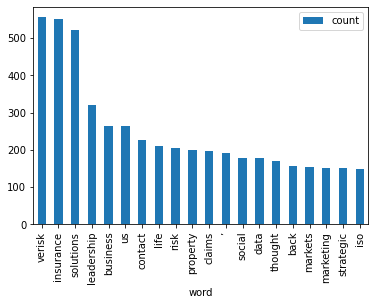

In [9]:
# import matplotlib library
import matplotlib.pyplot as plt

  
# plotting graph
data_df.plot(x="word", y=["count"], kind="bar")

**Observation:**

- The 5 most common words are **verisk, insurance, solutions, leadership, business**.